# Problem Statement

World Health Organization(WHO) conducted a world-wide survey and collected data from various regions of the world to determine life expectancy of the people of those regions. They collected this data through local sources and with the help of several local and internation NGOs that were operating in those areas. 

The data we have is a sample of the original data collected by WHO. Your job is to follow the Data Science pipeline and build a Machine Learning model that will predict the average life expectancy of the people of an area based on given features. The pipeline is as follows:

1. Data Wrangling and Preprocessing
2. Exploratory Data Analysis
3. Feature Selection
4. Model Training
5. Testing and Optimization

***While solving this problem, build an intuition about which features are useful using a thorough analysis and build a regression model with minimum loss/error. The evaluation metric that will be used is Mean Absolute Error. Also make sure that you model is neither underfitting nor overfitting.***  

In [5]:
# If you want to install any missing packages, then uncomment the lines given below and run them 
# to ensure that you have all the dependencies you need to run the notebook.
import sys
!pip install missingno

In [6]:
# Libraries
import pandas as pd
import numpy as np
import missingno as mno
import seaborn as sns
import matplotlib.pyplot as plt


## Data Description 

The first thing you need to do before solving any Data Science problem is getting familiar with the dataset. Get to know your data by printing out some stats, checking its dimensions and checking data types of features.

Column | Description
:---|:---
`surface_area` | The total area in square kilometers
`agricultural_land` | The agricultural land of the total area in square kilometers 
`forest_area` | The forest area in the total area in square kilometers
`armed_forces_total` | The count of armed forces paid by this geographical area
`urban_pop_major_cities` | The percent of the total population dwelling in major cities
`urban_pop_minor_cities` | The percent of the total population dwelling in minor cities
`national_income` | National Income as an ordinal categorical variable
`inflation_annual` | Yearly Inflation Rate
`inflation_monthly` | Average Monthly Inflation Rate = annual inflation/12
`inflation_weekly` | Average Weekly Inflation Rate = annual inflation/52
`mobile_subscriptions` | Describes the number of mobile subscriptions per person 
`internet_users` | The average number of people using the internet in a range of 100 or 1000 people
`secure_internet_servers_total` | The actual number of secure internet servers in the area
`improved_sanitation` | The known access of the population to improved sanitation facilities
`women_parliament_seats_rate ` | Describes the percent range of parliament seats occupied by women
`life_expectancy` | Years of life an average person is expected to live in this area (target variable).

In [7]:
# Load training data
data = pd.read_csv('train.csv')
data = data.drop(columns=['Unnamed: 0'])
data.head()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,120540.0,2.632839e+06,5.417843e+06,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195
1,752610.0,2.403039e+07,4.957554e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366
2,1396.0,3.000000e+03,8.000000e+01,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000
3,2758812.0,1.228845e+08,1.050943e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197
4,340.0,1.100000e+04,1.699000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561


In [8]:
# Dimensions of training data
data.shape

(362, 16)

In [9]:
# Explore columns
data.columns

Index(['surface_area', 'agricultural_land', 'forest_area',
       'armed_forces_total', 'urban_pop_major_cities',
       'urban_pop_minor_cities', 'national_income', 'inflation_annual',
       'inflation_monthly', 'inflation_weekly', 'mobile_subscriptions',
       'internet_users', 'secure_internet_servers_total',
       'improved_sanitation', 'women_parliament_seats_rate',
       'life_expectancy'],
      dtype='object')

In [10]:
# Description
data.describe()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,inflation_annual,inflation_monthly,inflation_weekly,secure_internet_servers_total,life_expectancy
count,3.620000e+02,3.580000e+02,3.570000e+02,3.180000e+02,360.000000,360.000000,146.000000,156.000000,20.000000,3.520000e+02,362.000000
mean,4.021884e+06,1.594881e+08,1.204151e+08,9.849864e+05,27.659456,29.175242,1.681539,0.475969,0.396478,2.949654e+08,71.059691
std,1.234491e+07,4.964143e+08,3.796623e+08,2.994686e+06,20.512885,21.206494,0.980308,0.153430,0.203583,7.234006e+08,8.332818
min,3.030000e+01,3.000000e+02,0.000000e+00,5.000000e+01,0.091444,0.074575,-2.372263,0.250543,0.209993,4.002500e+04,48.850634
25%,2.783000e+04,1.054198e+06,4.951445e+05,1.218000e+04,10.624625,11.013743,1.202953,0.347799,0.232118,3.468446e+06,65.469854
50%,2.037745e+05,5.360256e+06,3.928535e+06,5.352500e+04,24.459439,26.735127,1.762683,0.459790,0.297938,2.671228e+07,73.238024
75%,1.081610e+06,4.221935e+07,2.241297e+07,2.598000e+05,38.587177,43.499418,2.485675,0.577340,0.537541,2.173937e+08,77.125610
max,1.343253e+08,5.067600e+09,4.132117e+09,2.720662e+07,92.409069,89.142904,2.997694,0.810152,0.781527,8.207343e+09,83.480488


In [12]:
# Check Datatypes
data.dtypes

surface_area                     float64
agricultural_land                float64
forest_area                      float64
armed_forces_total               float64
urban_pop_major_cities           float64
urban_pop_minor_cities           float64
national_income                   object
inflation_annual                 float64
inflation_monthly                float64
inflation_weekly                 float64
mobile_subscriptions              object
internet_users                    object
secure_internet_servers_total    float64
improved_sanitation               object
women_parliament_seats_rate       object
life_expectancy                  float64
dtype: object

In [13]:
# Print head or tail
data.head()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,120540.0,2.632839e+06,5.417843e+06,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195
1,752610.0,2.403039e+07,4.957554e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366
2,1396.0,3.000000e+03,8.000000e+01,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000
3,2758812.0,1.228845e+08,1.050943e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197
4,340.0,1.100000e+04,1.699000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561


## Data Wrangling and Preprocessing

This is perhaps the most time consuming and challenging part of any Data Science or Machine Learning problem. You have to preprocess your data in order to make it useful for data analysis and model training. Although, the steps involved vary depending on the problem and the dataset but here we have provided a roughly generic approach which is applicable for most problems. The steps involved are as follows:

1. Look for Null or Missing Values
2. Change data type of features, if required
3. Encode data of categorical features
4. Deal with Null or Missing values

In [131]:
# Check for any null or missing values
data.isnull().values.any()

True

In [132]:
# Check missing values in each column of training data
data.isnull().sum()

surface_area                       0
agricultural_land                  4
forest_area                        5
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
dtype: int64

In [14]:
# print(data['mobile_subscriptions'].dtype)

col_list = [c for c in data.columns if data[c].dtype == 'object']
col_list

['national_income',
 'mobile_subscriptions',
 'internet_users',
 'improved_sanitation',
 'women_parliament_seats_rate']

In [15]:
data['women_parliament_seats_rate'].unique().tolist()

['[0%-25%)', 'unknown', '[25%-50%)', '[50%-75%)']

In [16]:
# Make a copy of data
train_data = data.copy()

In [136]:
# train_data.loc[train_data['national_income'] == 'unknown', 'national_income'] = -1
# train_data['national_income']

In [17]:
# Change data types of columns
for c in col_list:
    if c != 'internet_users':
        train_data[c] = train_data[c].astype('category')
        train_data[c] = train_data[c].cat.codes

In [18]:
# Compare Actual and Encoded labels
for c in col_list:
    if c != 'internet_users':
        print('column:', c)
        print(data[c].unique().tolist())
        print(train_data[c].unique().tolist(), '\n')

column: national_income
['unknown', 'very low', 'high', 'medium low', 'medium high', 'low', 'very high']
[4, 6, 0, 3, 2, 1, 5] 

column: mobile_subscriptions
['less than 1 per person', 'more than 1 per person', 'more than 2 per person', 'unknown', 'more than 3 per person']
[0, 1, 2, 4, 3] 

column: improved_sanitation
['high access', 'low access', 'no info', 'very high access', 'medium access', 'very low access']
[0, 1, 3, 4, 2, 5] 

column: women_parliament_seats_rate
['[0%-25%)', 'unknown', '[25%-50%)', '[50%-75%)']
[0, 3, 1, 2] 



In [19]:
train_data['internet_users'].head()

0      0 per 1000 people
1    154 per 1000 people
2      90 per 100 people
3      76 per 100 people
4    350 per 1000 people
Name: internet_users, dtype: object

In [20]:
# Convert unknown in internet_uses to -1
train_data.loc[train_data['internet_users'] == 'unknown', 'internet_users'] = -1

In [21]:
train_data.loc[train_data['internet_users'].str.split(' ').str[2] == '1000', 
               'internet_users'] = train_data['internet_users'].str.split(' ').str[0].astype(float)

In [22]:
train_data.loc[train_data['internet_users'].str.split(' ').str[2] == '100', 
               'internet_users'] = train_data['internet_users'].str.split(' ').str[0].astype(float) * 10

In [23]:
train_data['internet_users'] = train_data['internet_users'].astype(float) 

In [24]:
train_data.isnull().sum()

surface_area                       0
agricultural_land                  4
forest_area                        5
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
dtype: int64

In [25]:
train_data = train_data.drop(columns=['inflation_monthly', 'inflation_weekly'])

In [26]:
# Deal with Missing Values
columns = ['agricultural_land', 'forest_area', 'armed_forces_total', 
           'urban_pop_minor_cities', 'urban_pop_major_cities', 'secure_internet_servers_total']

for c in columns:
    missing_vals = train_data[c].isnull().sum()
    observed_vals = train_data.loc[train_data[c].notnull(), c]
    train_data.loc[train_data[c].isnull(), c] = observed_vals.mean()
#     df.loc[df[c].isnull(), c] = np.random.choice(observed_vals, missing_vals, replace = True)


In [27]:
train_data.isnull().sum()

surface_area                       0
agricultural_land                  0
forest_area                        0
armed_forces_total                 0
urban_pop_major_cities             0
urban_pop_minor_cities             0
national_income                    0
inflation_annual                 216
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total      0
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
dtype: int64

In [28]:
from sklearn import linear_model

# Regression to impute missing values in inflation_annual
# params = [c for c in train_data.columns if c != 'inflation_annual']
X = train_data[train_data['inflation_annual'].notnull()]
y = train_data.loc[train_data['inflation_annual'].notnull(), 'inflation_annual']
X = X.drop(columns=['inflation_annual'])
print(X.shape, y.shape)

(146, 13) (146,)


In [29]:
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [30]:
X_miss = train_data[train_data['inflation_annual'].isnull()]
X_miss = X_miss.drop(columns = ['inflation_annual'])
print(X_miss.shape)

(216, 13)


In [31]:
train_data.loc[train_data['inflation_annual'].isnull(), 'inflation_annual'] = model.predict(X_miss)

In [32]:
train_data.isnull().sum()

surface_area                     0
agricultural_land                0
forest_area                      0
armed_forces_total               0
urban_pop_major_cities           0
urban_pop_minor_cities           0
national_income                  0
inflation_annual                 0
mobile_subscriptions             0
internet_users                   0
secure_internet_servers_total    0
improved_sanitation              0
women_parliament_seats_rate      0
life_expectancy                  0
dtype: int64

## Data Analysis and Visualizations

Performing a detailed analysis of the data helps you understand which features are important, what's their correlation with each other which features would contribute in predicting the target variable. Different types of visualizations and plots can help you acheive that. These include:

1. Bar Plots
2. Joint Plots
3. Box Plots
4. Correlation Heatmap
5. Distribution Plot
6. PCA Bi-plot

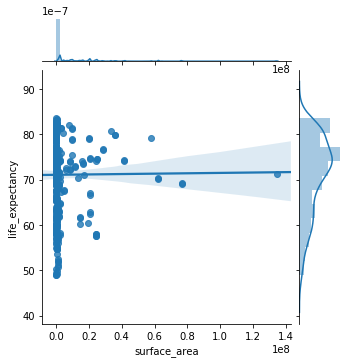

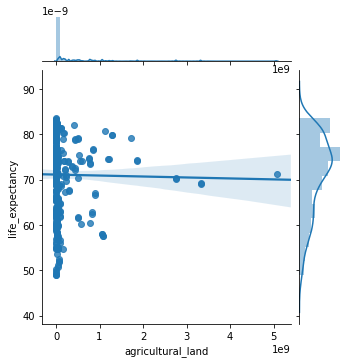

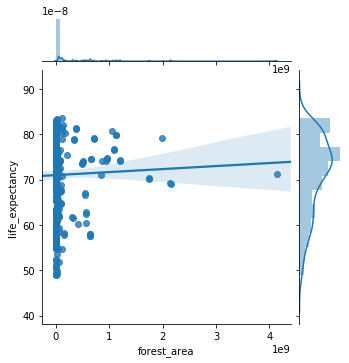

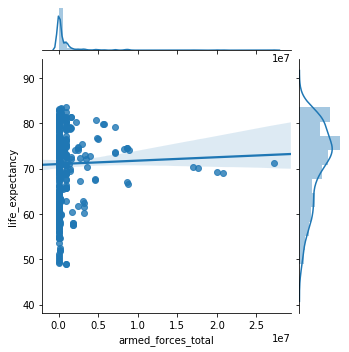

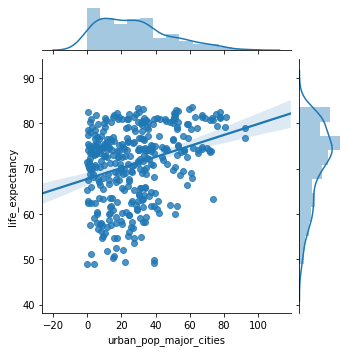

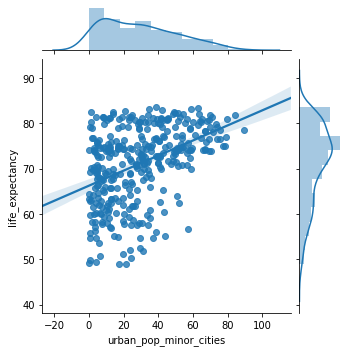

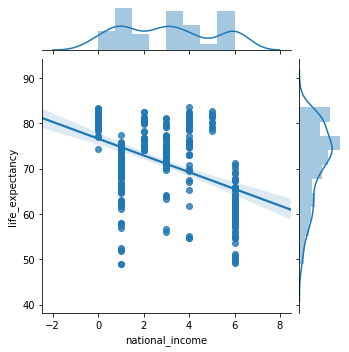

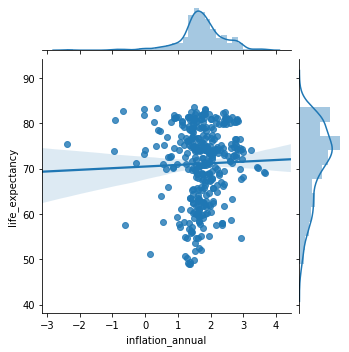

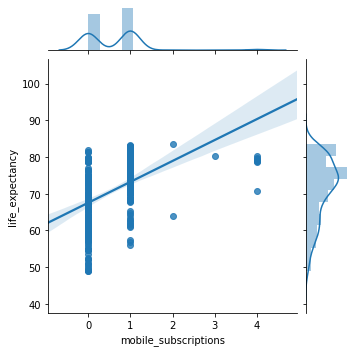

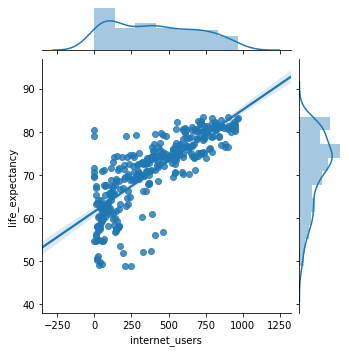

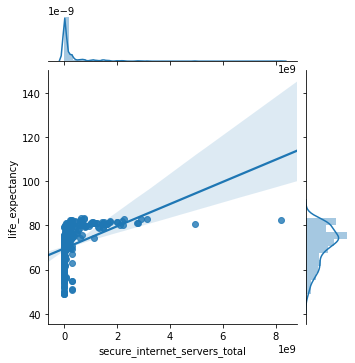

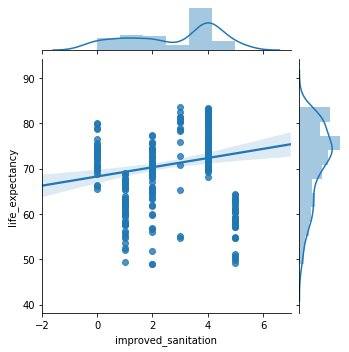

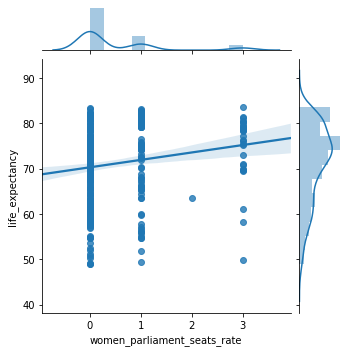

In [158]:
# plot joint plots
cols = train_data.columns.values
for c in cols:
    if c != "life_expectancy":
        sns.jointplot(x=c, y="life_expectancy", data=train_data, kind = 'reg', height = 5)
plt.show()

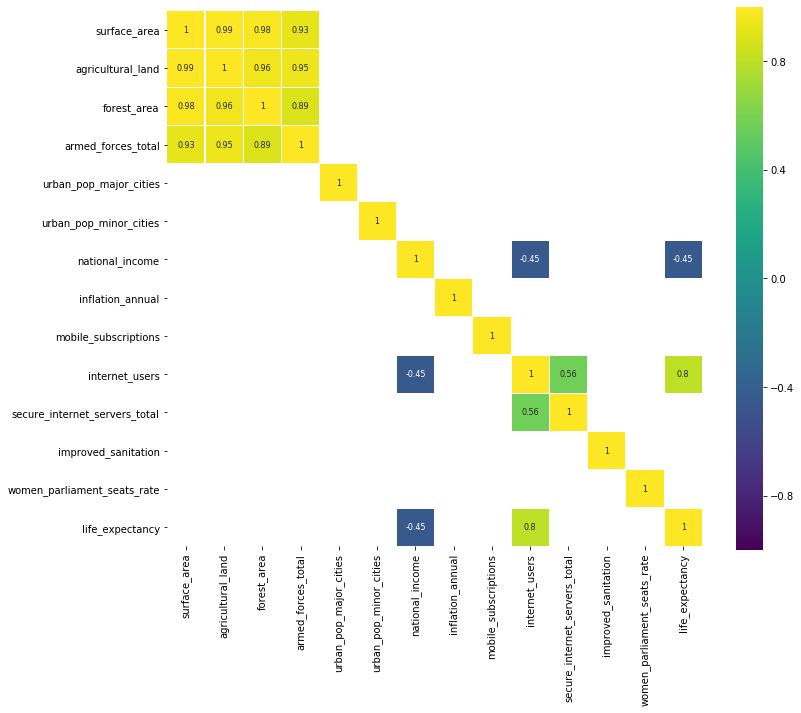

In [159]:
# Correlation heatmap
corr = train_data.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

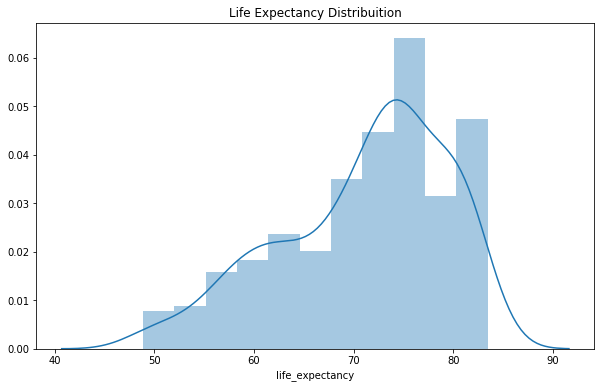

In [161]:
# distribution plot of target variable (life expectancy)
plt.figure(figsize = (10, 6))
plt.title('Life Expectancy Distribuition')
sns.distplot(train_data['life_expectancy'])
plt.show()

## Feature Selection

After performing a thorough analysis, we can select useful features required and train the model using those features. Sometimes, we can simply pass all the features and then determine important features from the trained classifier by evaluating the weights assigned by the classifier to each features. We'll get to that later on. 

In [33]:
# We have already removed inflation monthly and weekly. 
# Fetures agricultural_land and forest_area are highly correlated with surface_area. 
# Remove agricultural_land and forest_area and keep surface_area only

train_data = train_data.drop(columns=['agricultural_land', 'forest_area'])
train_data.shape

(362, 12)

## Model Training

This is a Regression problem since we are predicting life expetancy which is a continous random variable. The steps involved are as follows:

1. Standardize or Normalize Training Data
2. Train Test Split
3. Train Model
4. Evaluate Important Features

**Note: It's a good practice to train multiple models (2 or 3 at least) and then choose the best performing model.**

In [34]:
# Standardize data
from sklearn.preprocessing import StandardScaler

# Columns not to be standardized. These are columns with categorical data, 
# also we don't standardize our target vraiable
cols = ['national_income', 'mobile_subscriptions', 'life_expectancy',
        'improved_sanitation', 'women_parliament_seats_rate']

# Pick remaining columns and standardize them 
columns = [c for c in train_data.columns if c not in cols]
scaler = StandardScaler()
scaler.fit(train_data[columns])
train_data[columns] = scaler.transform(train_data[columns])


In [35]:
# Train Test Split

from sklearn.model_selection import train_test_split
y = train_data['life_expectancy']
X = train_data.drop(columns=['life_expectancy'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (289, 11)
Validation Set Dimensions: (73, 11)


In [38]:
# Train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error

# Train Random Forest Regressor
randomf = RandomForestRegressor(n_estimators=200)
randomf.fit(X_train, y_train)

# Train Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=200)
gb_reg.fit(X_train, y_train)

# Train ExtraTrees Regressor
ext_reg = ExtraTreesRegressor(n_estimators=200)
ext_reg.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=200)

In [39]:
# Measure mean absolute error for training and validation sets [MODEL 1]
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, randomf.predict(X_train)))
print('Mean Absolute Error for Test Set:', mean_absolute_error(y_test, randomf.predict(X_test)))

Mean Absolute Error for Training Set: 1.0270563380373685
Mean Absolute Error for Test Set: 2.380248597905471


In [40]:
# Measure mean absolute error for training and validation sets [MODEL 2]
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, gb_reg.predict(X_train)))
print('Mean Absolute Error for Test Set:', mean_absolute_error(y_test, gb_reg.predict(X_test)))

Mean Absolute Error for Training Set: 0.6447576158440361
Mean Absolute Error for Test Set: 2.4179444681844493


In [41]:
# Measure mean absolute error for training and validation sets [MODEL 3]
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, ext_reg.predict(X_train)))
print('Mean Absolute Error for Test Set:', mean_absolute_error(y_test, ext_reg.predict(X_test)))

Mean Absolute Error for Training Set: 1.9226450497038005e-13
Mean Absolute Error for Test Set: 2.33870438085616


feature: surface_area = 0.026697066205259502
feature: armed_forces_total = 0.026390615551818247
feature: urban_pop_major_cities = 0.02309661568383833
feature: urban_pop_minor_cities = 0.02558231494780406
feature: national_income = 0.14923956847006156
feature: inflation_annual = 0.038142862453903435
feature: mobile_subscriptions = 0.06646434659376337
feature: internet_users = 0.4708309548539078
feature: secure_internet_servers_total = 0.053554236289963725
feature: improved_sanitation = 0.0917874956634865
feature: women_parliament_seats_rate = 0.02821392328619339


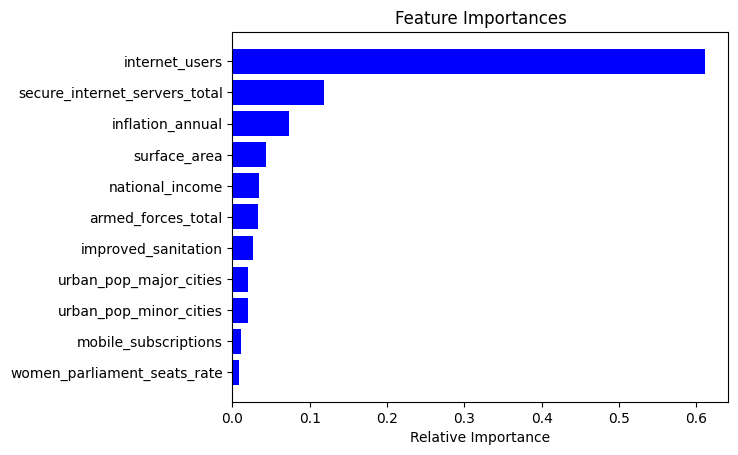

In [42]:
# important features for random forest regressor
for name, importance in zip(X.columns, ext_reg.feature_importances_):
    print('feature:', name, "=", importance)
    
importances = randomf.feature_importances_
indices = np.argsort(importances)
features = X.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Testing and Optimization

After training your model and establishing a baseline performance on default parameters, you have to work on optimizaing it to achieve best results. For this you have to perform hyper-parameter tuning and there are a couple of ways to do this but an efficient solution is using Grid-Search-Cross-Validation approach where you form a grid of parameters and iteratively apply cross-validation to find the best set of parameters for which our model performs the best.

In [46]:
# parameter grid for fine-tuning random forest regressor 
# you can take a look at scikit-learn official documentation 
# where you'll find the parameters of random forest regressor
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [5, 10, 12], 
          'max_features': [2, 4, 6], 
          'min_samples_leaf': [3, 4, 5], 
          'min_samples_split': [8, 10, 12], 
          'n_estimators': [100, 200, 300]}

k = 5
score_param = 'neg_mean_absolute_error'
rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator=rf, param_grid=params, scoring=score_param, n_jobs=-1, cv=k, verbose=True)
rf_grid.fit(X_train, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 12], 'max_features': [2, 4, 6],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=True)

In [47]:
# get best model (trained on best set of params) from grid search cv
best_model = rf_grid.best_estimator_

# get best model predictions for training and validation sets
predict_train = best_model.predict(X_train)
predict_test = best_model.predict(X_test)

# print mean absolute error for predictions taken from the best model 
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, predict_train))
print('Mean Absolute Error for Validation Set:', mean_absolute_error(y_test, predict_test))

Mean Absolute Error for Training Set: 1.749376472917749
Mean Absolute Error for Validation Set: 2.4400941690503695
